In [1]:
import os
import sys
import torch
from torch.utils import data

from segdataset import SegmentationDataset

In [2]:
from pathlib import Path
import torch

from torch.utils.data import DataLoader
from torchvision import transforms
import datahandler
from model import createDeepLabv3
from trainer import train_model
from datahandler import get_dataloader_single_folder

In [3]:
data_path = '../Data'
dataloaders = get_dataloader_single_folder(
                  '../Data', 'Image',['Eyes_dorsal', 'Outline_dorsal', 'Outline_lateral', 'Ov_lateral', 'Heart_lateral', 'Yolk_lateral'],batch_size=2)

In [4]:
model = torch.load('./Model_resnet50_BCELoss/weights.pt',map_location=torch.device('cpu'))

In [ ]:
from torchvision import transforms
import matplotlib.pyplot as plt

device = 'cpu'
for sample in iter(dataloaders['Test']):
    print(sample['image'].size())
    inputs = sample['image'].to(device)
    outputs = model(inputs)
    plt.imshow(torch.split(sample['image'],1,0)[0].squeeze().permute(1, 2, 0))
    plt.show()
    # change squeeze() [i] i to change the mask
    for i in range(6): 
        plt.imshow(torch.split(outputs['out'].cpu(),1,0)[0].squeeze()[i].detach().numpy())
        plt.show()
    break

torch.Size([2, 3, 190, 1024])


/veu4/usuaris27/zeclinics2/.local/lib/python3.6/site-packages/matplotlib/image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/veu4/usuaris27/zeclinics2/.local/lib/python3.6/site-packages/matplotlib/image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/veu4/usuaris27/zeclinics2/.local/lib/python3.6/site-packages/matplotlib/image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)


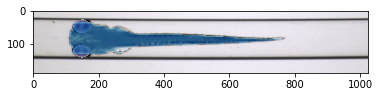

torch.Size([2, 3, 190, 1024])


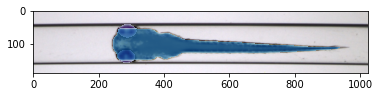

torch.Size([2, 3, 190, 1024])


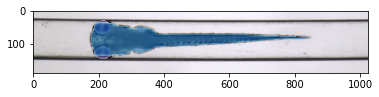

torch.Size([2, 3, 190, 1024])


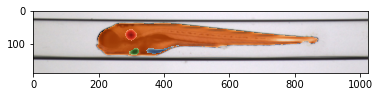

torch.Size([2, 3, 190, 1024])


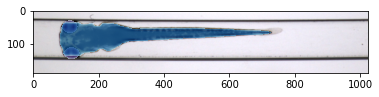

torch.Size([2, 3, 190, 1024])


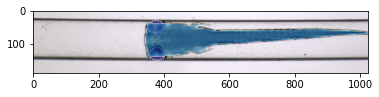

torch.Size([2, 3, 190, 1024])


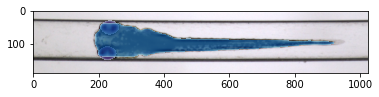

torch.Size([2, 3, 190, 1024])


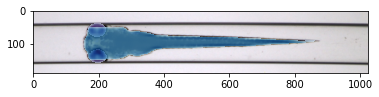

torch.Size([2, 3, 190, 1024])


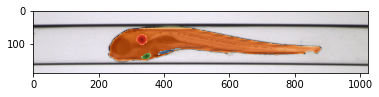

torch.Size([2, 3, 190, 1024])


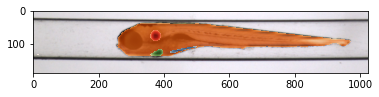

torch.Size([2, 3, 190, 1024])


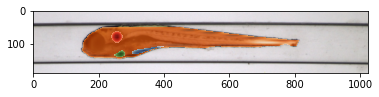

In [9]:
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

cmaps = ['Purples', 'Oranges', 'Blues', 'Greens', 'Blues', 'Reds']

cont = 0

device = 'cpu'
for sample in iter(dataloaders['Test']):
    print(sample['image'].size())
    inputs = sample['image'].to(device)
    outputs = model(inputs)
    plt.figure()
    plt.imshow(torch.split(sample['image'],1,0)[0].squeeze().permute(1, 2, 0))
    for i in range(6):
        mask = torch.split(outputs['out'].cpu(),1,0)[0].squeeze()[i].detach().numpy()
        mask = np.ma.masked_where(mask < 0.05, mask)
        plt.imshow(mask, cmaps[i], alpha = 0.7)
    plt.show()
    
    if cont == 10: break
    else: cont += 1